<a href="https://colab.research.google.com/github/prasadanvekar/elvtrdocs/blob/main/Bonus_Assignment_Advanced_Model_Enhancement_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install the SMOTE library
!pip install imbalanced-learn

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  

       distan

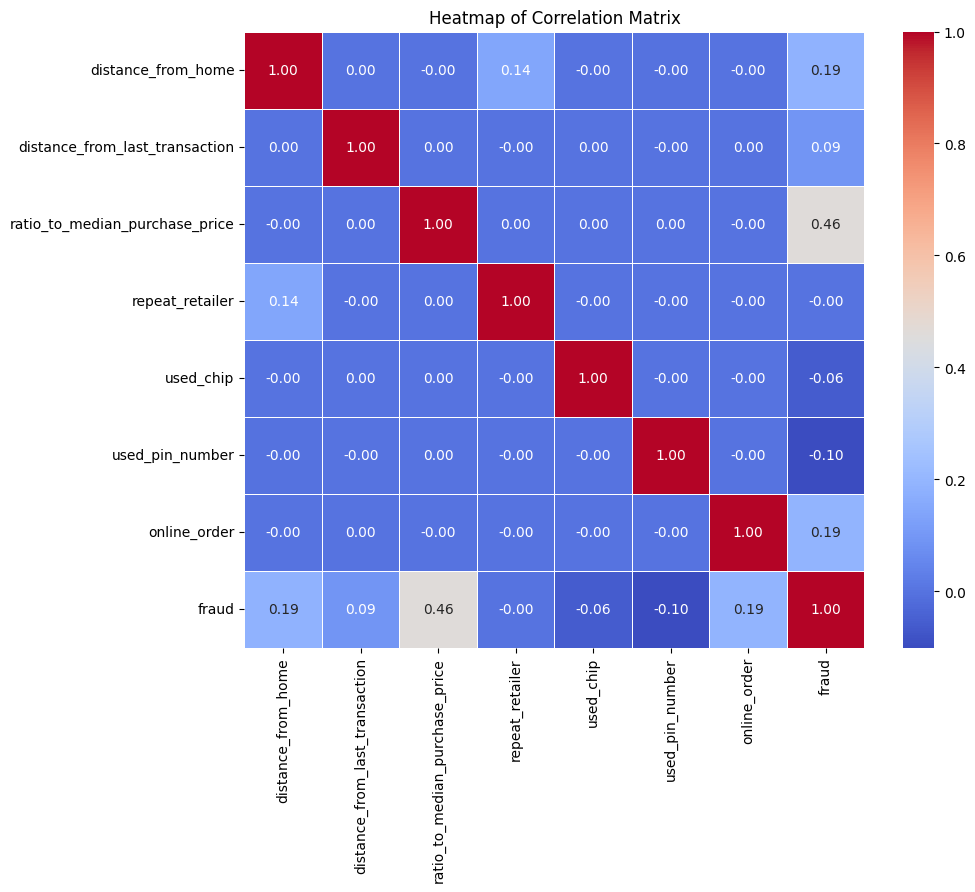


--- Box Plots for Each Numeric Column ---


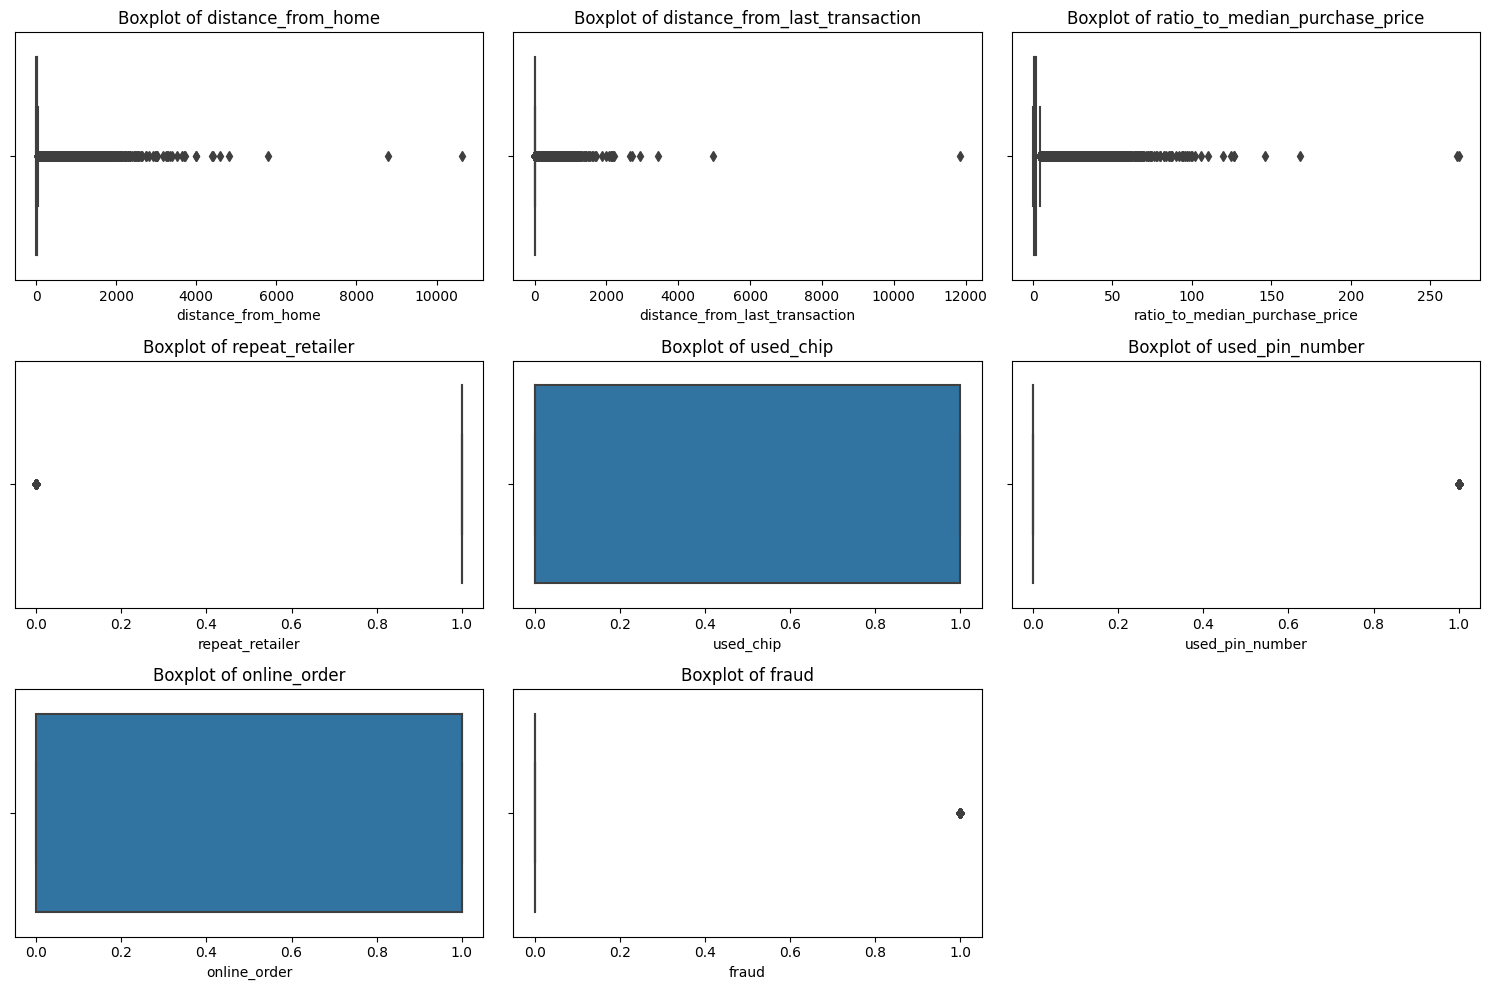

Random Forest  - Accuracy: 1.000
Random Forest  - Recall: 1.000
Random Forest  - Precision: 1.000
Random Forest  - Confusion Matrix: [[182420      1]
 [     3 182615]]
Random Forest  - Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182421
         1.0       1.00      1.00      1.00    182618

    accuracy                           1.00    365039
   macro avg       1.00      1.00      1.00    365039
weighted avg       1.00      1.00      1.00    365039



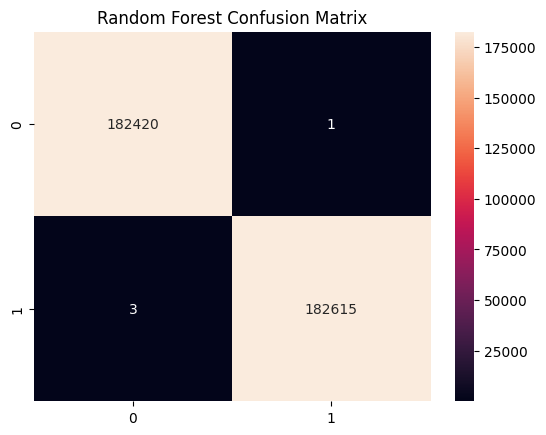

Cross-validation Scores: [0.99991508 0.99999452 1.         1.         0.9999863 ]
Mean Accuracy: 0.9999791802992573
Standard Deviation: 3.244118155328136e-05
Feature Importances:
                          Feature  Importance
2  ratio_to_median_purchase_price    0.543555
0              distance_from_home    0.181109
6                    online_order    0.124005
1  distance_from_last_transaction    0.077110
5                 used_pin_number    0.035157
4                       used_chip    0.030493
3                 repeat_retailer    0.008571


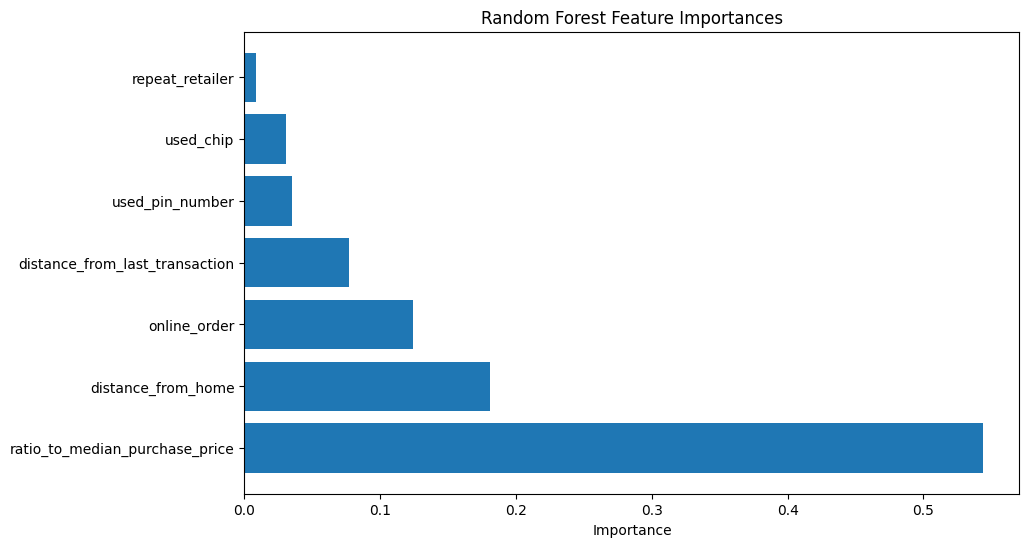

In [10]:
##############################################################################
# Objective: apply more sophisticated techniques in model enhancement        #
# and evaluation within the context of fraud detection                       #
# Date: 13 Jan 2024                                                          #
# Author: Prasad S Anvekar                                                   #
##############################################################################
#Data upload

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,  roc_curve, auc
from sklearn.tree import plot_tree
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

################################################################################
#Data exploration section                                                      #
################################################################################
#Data Exploration
# Print the top and bottom 5 rows
print(data.head(5))
print("")

#Summary statistics
print(data.describe())
print('************************************************************************')
print(data['fraud'].value_counts())
print('************************************************************************')
# Event rate
event_rate = data['fraud'].mean() * 100
print(f'Event Rate: {event_rate:.2f}%')

# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Analysis specific to the target variable 'default'
missing_values_target = missing_values['fraud']
missing_percentage_target = missing_percentage['fraud']

# Preparing the analysis output for the entire dataset and for the target variable
missing_data_analysis = pd.DataFrame({
    'Feature': data.columns,
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

missing_data_analysis_target = pd.DataFrame({
    'Feature': ['fraud'],
    'Missing Values': [missing_values_target],
    'Percentage (%)': [missing_percentage_target]
})

# To display the analysis results
print("Missing Data Analysis for the Entire Dataset:")
print(missing_data_analysis)
print("\nMissing Data Analysis for the Target Variable 'fraud':")
print(missing_data_analysis_target)


# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Box plot visualization
print("\n--- Box Plots for Each Numeric Column ---")
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
n_rows, n_cols = 3, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

################################################################################
# Random Forest Model                                                          #
################################################################################

# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE class
sm = SMOTE(random_state=42, k_neighbors=5)

# Apply SMOTE alogirthm to the dataset
X_res, y_res = sm.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Define the hyperparameters for the Random Forest
#rf_params = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [3, 5, 7],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'max_features': ['sqrt', 'log2']
#}

# Create GridSearchCV object with RandomForestClassifier
#rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy', n_jobs=-1)

# Initialize a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)


###Another way to implement SMOTE#######
# Create a pipeline with SMOTE and Random Forest
#pipeline = Pipeline([
#    ('sampling', SMOTE(sampling_strategy=1)),  # Adjust the sampling strategy as needed
#    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
#])

# Fit the pipeline on the training data
#pipeline.fit(X_train, y_train)

# Make predictions on the test data
#y_pred = pipeline.predict(X_test)
##########################


# Calculate the performance metrics
rf_acc = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the performance metrics
print(f"Random Forest  - Accuracy: {rf_acc:.3f}")
print(f"Random Forest  - Recall: {rf_recall:.3f}")
print(f"Random Forest  - Precision: {rf_precision:.3f}")
print(f"Random Forest  - Confusion Matrix: {conf_matrix}")
print(f"Random Forest  - Classification Report: {classification_rep}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

################################################################################
# Cross Validation using Random Forest                                         #
################################################################################

# Perform 5-fold cross-validation and get accuracy scores
cv_scores = cross_val_score(rf, X_res, y_res, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

################################################################################
# Feature Importance using Random Forest                                       #
################################################################################

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print("Feature Importances:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

The above the code demonstrates data exploration, handling class imbalance using SMOTE, training a Random Forest model, evaluating its performance, and conducting cross-validation and feature importance analysis.

**Balancing the data:**

Have used SMOTE (Synthetic Minority Oversampling Technique) python library

"imbalanced-learn"

We need to install these libraries as a pre-requisite.

When a machine learning model is trained on an imbalanced dataset it tends to perform poorly. When acquiring more data isn’t an option, we have to resort to down-sampling or up-sampling. Down-sampling is bad because it removes samples that could otherwise have been used to train the model. Up-sampling on its own is less than ideal since it causes our model to overfit. SMOTE is a technique to up-sample the minority classes while avoiding overfitting. It does this by generating new synthetic examples close to the other points (belonging to the minority class) in feature space.

**Cross-Validation:**
Have implemented 5 fold cross-validation technique using cross_val_score and prints the cross-validation scores, mean accuracy, and standard deviation.

**Feature Importance Analysis**

Calculates feature importances using the Random Forest model and visualizes them in a horizontal bar chart.

**Conclusion:**

Looking at the Confusion Matrix, we can see that there are an equal number of positive samples as negative samples and the model have very few negatives.

From the feature importance analysis, ratio_to_median_purchase_price, distance_from_home have more weightage in identifyng the fraud transaction.

Tried various methods of using SMOTE and Random Forest Model but the end results were same. Tried hypertuning the random forest model but the training time exceeded more then 5~7 hours.